In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-86.6617128676717, 55.60167111661096),
 (30.563667972589585, -150.25085014226377),
 (27.110504408546916, -48.844082991603784),
 (86.30835699346582, 178.25496355160806),
 (-42.57743387676571, -171.79995875544407),
 (27.545414720450594, -30.874779473614808),
 (-34.02750879414064, -100.31048800920061),
 (-35.3522156279919, -100.69400849896908),
 (-85.10447631738471, -112.52375955619377),
 (42.74499227239002, 155.89522320359094),
 (-53.282734971266166, 82.09471773519766),
 (-5.293508141706781, -94.73150550550147),
 (-61.07123474115359, 112.37443758940435),
 (-25.126769960370183, -135.88791935587886),
 (43.339834571811, 77.96859640272845),
 (-14.124088732289536, 44.96828063954834),
 (6.960830931496801, -155.3808563384501),
 (41.10908305737664, -98.43675042327183),
 (-7.517241973446005, -60.35226249683137),
 (4.508579029639407, -32.04495034159115),
 (17.826169867331572, -167.5161502664116),
 (-33.51988559584856, -56.01336108247497),
 (-38.08960986677653, 81.38600897557359),
 (-14.479157689

In [7]:
# import citypy
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=54ac3b46027f55748bb064668bdeb518


In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | kahului
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | leningradskiy
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | esik
Processing Record 15 of Set 1 | chirongui
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | grand island
Processing Record 18 of Set 1 | aripuana
Processing Record 19 of Set 1 | touros
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | durazno
Processing Record 22 of Set 1 | bambous virieux
Pro

Processing Record 34 of Set 4 | provideniya
Processing Record 35 of Set 4 | grajau
Processing Record 36 of Set 4 | gamba
Processing Record 37 of Set 4 | lagoa
Processing Record 38 of Set 4 | puerto madryn
Processing Record 39 of Set 4 | lata
Processing Record 40 of Set 4 | vastervik
City not found. Skipping...
Processing Record 41 of Set 4 | kurilsk
Processing Record 42 of Set 4 | raudeberg
Processing Record 43 of Set 4 | port elizabeth
Processing Record 44 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 45 of Set 4 | te karaka
Processing Record 46 of Set 4 | hofn
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | pandan
Processing Record 49 of Set 4 | yulara
Processing Record 50 of Set 4 | vozhega
Processing Record 1 of Set 5 | samarai
Processing Record 2 of Set 5 | aklavik
Processing Record 3 of Set 5 | ak-dovurak
Processing Record 4 of Set 5 | teahupoo
Processing Record 5 of Set 5 | korem
Processing Record 6 of Set 5 | huallanca
Processing Re

Processing Record 27 of Set 8 | puerto madero
Processing Record 28 of Set 8 | puerto carreno
Processing Record 29 of Set 8 | aksarka
Processing Record 30 of Set 8 | fethiye
Processing Record 31 of Set 8 | padang
Processing Record 32 of Set 8 | oga
Processing Record 33 of Set 8 | nichinan
Processing Record 34 of Set 8 | comodoro rivadavia
Processing Record 35 of Set 8 | kloulklubed
Processing Record 36 of Set 8 | pemangkat
Processing Record 37 of Set 8 | zaranj
Processing Record 38 of Set 8 | ranong
Processing Record 39 of Set 8 | dandong
Processing Record 40 of Set 8 | baykit
Processing Record 41 of Set 8 | victoria
Processing Record 42 of Set 8 | mangai
Processing Record 43 of Set 8 | asau
Processing Record 44 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 45 of Set 8 | roma
Processing Record 46 of Set 8 | vila franca do campo
Processing Record 47 of Set 8 | saskylakh
Processing Record 48 of Set 8 | vestmannaeyjar
Processing Record 49 of Set 8 | toliary
City not

Processing Record 15 of Set 12 | blagoveshchenka
Processing Record 16 of Set 12 | silver city
Processing Record 17 of Set 12 | tevriz
Processing Record 18 of Set 12 | isangel
Processing Record 19 of Set 12 | sisimiut
Processing Record 20 of Set 12 | saint-pascal
City not found. Skipping...
Processing Record 21 of Set 12 | samusu
City not found. Skipping...
Processing Record 22 of Set 12 | chaah
Processing Record 23 of Set 12 | do gonbadan
Processing Record 24 of Set 12 | yendi
Processing Record 25 of Set 12 | uruzgan
Processing Record 26 of Set 12 | najran
Processing Record 27 of Set 12 | canico
Processing Record 28 of Set 12 | potchefstroom
Processing Record 29 of Set 12 | kuche
City not found. Skipping...
Processing Record 30 of Set 12 | kavaratti
Processing Record 31 of Set 12 | baherden
Processing Record 32 of Set 12 | mehran
Processing Record 33 of Set 12 | curitibanos
Processing Record 34 of Set 12 | mayo
Processing Record 35 of Set 12 | wewak
Processing Record 36 of Set 12 | pri

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,77.49,83,100,8.10,ZA,2022-02-01 13:47:45
1,Kahului,20.8947,-156.4700,68.68,78,0,6.91,US,2022-02-01 13:47:46
2,Codrington,-38.2667,141.9667,57.87,56,100,16.69,AU,2022-02-01 13:47:46
3,Leningradskiy,69.3833,178.4167,-12.01,94,24,11.70,RU,2022-02-01 13:47:46
4,Vaini,-21.2000,-175.2000,78.96,89,40,3.44,TO,2022-02-01 13:47:47
5,Ribeira Grande,38.5167,-28.7000,63.00,77,20,18.41,PT,2022-02-01 13:47:47
6,Lebu,-37.6167,-73.6500,63.45,67,1,10.38,CL,2022-02-01 13:47:47
7,Punta Arenas,-53.1500,-70.9167,48.31,61,40,31.07,CL,2022-02-01 13:47:48
8,Busselton,-33.6500,115.3333,65.05,47,0,19.80,AU,2022-02-01 13:43:52
9,Puerto Ayora,-0.7393,-90.3518,73.54,93,94,1.01,EC,2022-02-01 13:45:12


In [31]:
new_column_order = ["City", "Country", "Date", "Lng", "Lat", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lng,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-02-01 13:47:45,26.8910,-33.5906,77.49,83,100,8.10
1,Kahului,US,2022-02-01 13:47:46,-156.4700,20.8947,68.68,78,0,6.91
2,Codrington,AU,2022-02-01 13:47:46,141.9667,-38.2667,57.87,56,100,16.69
3,Leningradskiy,RU,2022-02-01 13:47:46,178.4167,69.3833,-12.01,94,24,11.70
4,Vaini,TO,2022-02-01 13:47:47,-175.2000,-21.2000,78.96,89,40,3.44
...,...,...,...,...,...,...,...,...,...
580,Porto Novo,BJ,2022-02-01 14:03:18,2.6036,6.4965,90.73,27,90,9.91
581,Wanaka,NZ,2022-02-01 14:03:18,169.1500,-44.7000,59.79,92,100,6.40
582,Meadow Lake,US,2022-02-01 14:03:19,-106.5436,34.8014,39.15,34,8,3.56
583,Taltal,CL,2022-02-01 14:01:17,-70.4833,-25.4000,68.58,69,0,5.66


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [58]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

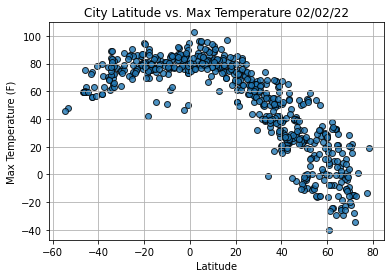

In [59]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

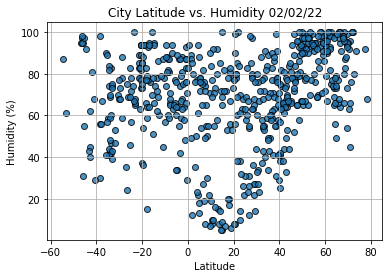

In [60]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

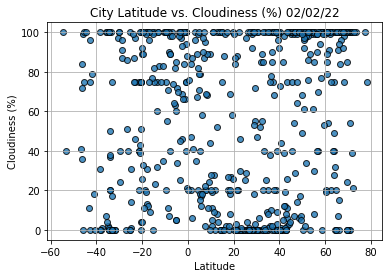

In [61]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

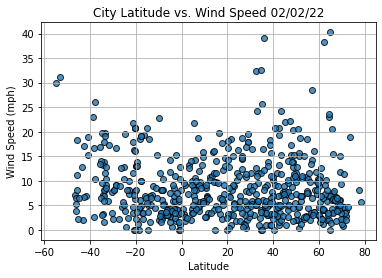

In [62]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [85]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

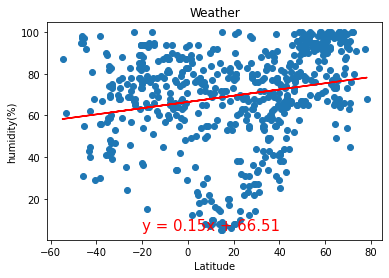

In [89]:
x_values = lats
y_values = humidity
# Call the function.

plot_linear_regression(x_values, y_values, 'Weather', 'humidity(%)', (-20,5))

In [65]:
index13 = city_data_df.loc[13]
index13

City                    Chirongui
Country                        YT
Date          2022-02-01 13:47:49
Lng                       45.1483
Lat                      -12.9319
Max Temp                    85.93
Humidity                       69
Cloudiness                    100
Wind Speed                   7.07
Name: 13, dtype: object

In [66]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lng,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kahului,US,2022-02-01 13:47:46,-156.4700,20.8947,68.68,78,0,6.91
3,Leningradskiy,RU,2022-02-01 13:47:46,178.4167,69.3833,-12.01,94,24,11.70
5,Ribeira Grande,PT,2022-02-01 13:47:47,-28.7000,38.5167,63.00,77,20,18.41
10,Albany,US,2022-02-01 13:47:48,-73.9662,42.6001,26.31,67,12,1.01
12,Esik,KZ,2022-02-01 13:47:49,77.4525,43.3552,22.42,64,2,7.20


In [67]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

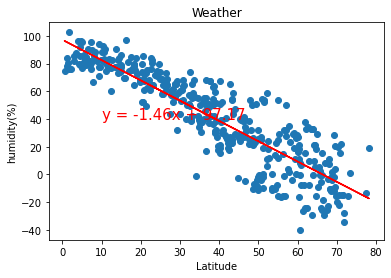

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

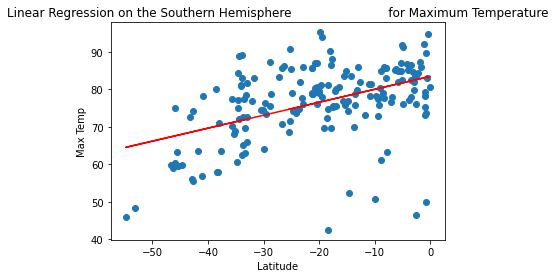

In [87]:
# Linear regression on the SouthernNorthern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

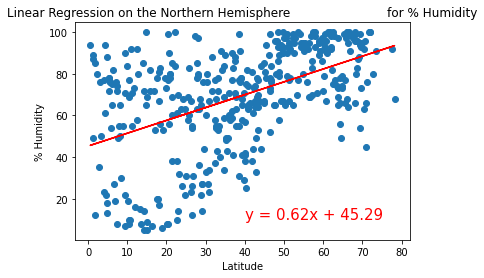

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

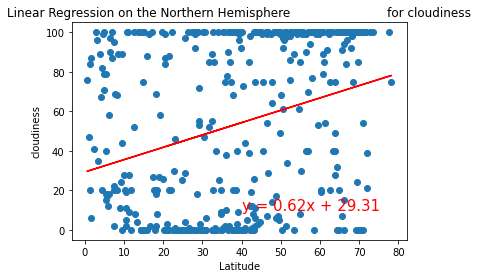

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for cloudiness', 'cloudiness',(40,10))

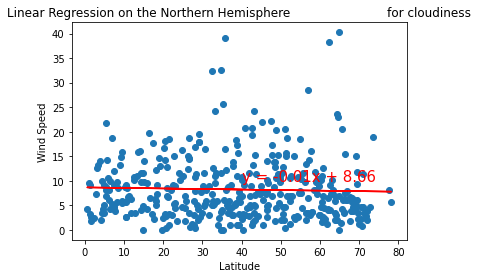

In [106]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for cloudiness', 'Wind Speed',(40,10))


